In [47]:
import numpy as np
import cv2 # openCV
import os 
from PIL import Image                   # PIL => pillow liberary 
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
cat_img_path =r"C:\Users\Vinayak\OneDrive\Documents\Deep Learning\CNN\Data\images\cats\cat_50.jpg"
cat = Image.open(cat_img_path)

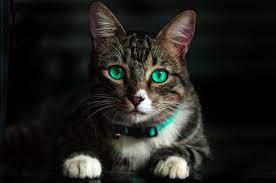

In [49]:
cat

In [50]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

In [51]:
catInPixel_form = np.array(cat)
catInPixel_form

#pixels values range ==>>  0-255

array([[[12, 17, 20],
        [27, 32, 35],
        [25, 29, 32],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[12, 17, 20],
        [27, 32, 35],
        [25, 29, 32],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[11, 16, 19],
        [26, 31, 34],
        [25, 29, 32],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [52]:
catInPixel_form.shape

(183, 276, 3)

In [53]:
catInPixel_form.ndim

3

In [54]:
catInPixel_form.min()

0

In [55]:
catInPixel_form.max()

255

In [56]:
path_dict = { 'cats' : [] , 'dogs' : [] }

In [57]:
from pathlib import Path
path_dict = {'cats':[],'dogs':[]}
base_directory = r"./Data/images"

for dir_name in os.listdir(base_directory):  # cats , dogs 
    dir_path = Path(os.path.join(base_directory,dir_name))
    print(dir_path)
    for image_name in os.listdir(dir_path):  
        # print(os.path.join(dir_path,image_name)) 
        path_dict[dir_name].append(os.path.join(str(dir_path),image_name))
        # path_dict[dir_path].append(os.path.join(dir_path,image_name))

Data\images\cats
Data\images\dogs


In [58]:
# import os

# cat_images_dir = r"C:\Users\Vinayak\OneDrive\Documents\Deep Learning\CNN\Data\images\cats"
# dog_images_dir = r"C:\Users\Vinayak\OneDrive\Documents\Deep Learning\CNN\Data\images\dogs"

# path_dt = {
#     "cats": [],
#     "dogs": []
# }

# def collect_image_paths(directory, extensions=('.jpg', '.jpeg', '.png')):
#     image_paths = []
#     for filename in os.listdir(directory):
#         if filename.lower().endswith(extensions):
#             image_paths.append(os.path.join(directory, filename))
#     return image_paths

# path_dt['cats'] = collect_image_paths(cat_images_dir)
# path_dt['dogs'] = collect_image_paths(dog_images_dir)

# # Print the populated dictionary
# print(path_dt)

In [59]:
len(path_dict['cats'])

349

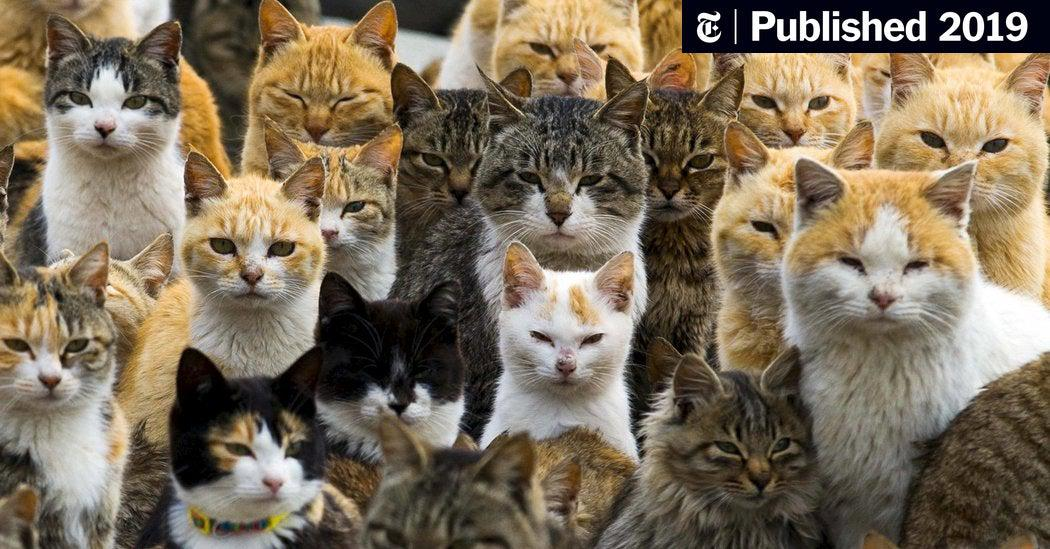

In [60]:
Image.open(path_dict['cats'][300])

In [61]:
sample_img =cv2.imread(path_dict['dogs'][23])
reduced_img = cv2.resize(sample_img,(224,224))
reduced_img.shape

(224, 224, 3)

In [62]:
x= []
y = [] 

for class_name ,paths  in path_dict.items():
    for path in paths :
       sample_img =cv2.imread(path)
       reduced_img = cv2.resize(sample_img,(224,224))
       x.append(reduced_img)
       y.append(class_name)

In [63]:
len(x)  , len(y)

(697, 697)

In [64]:
set(y)

{'cats', 'dogs'}

In [65]:
Y = [] 
for item in y:
    if item == 'cats':
        Y.append(1)
    else:
        Y.append(0)

In [66]:
set(Y)

{0, 1}

In [67]:
# changeing X into 4D numpy array 
X = np.array(x)
Y = np.array(Y)
X

array([[[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],

        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],

        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],

        ...,

        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],

        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],

        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
        

In [68]:
# Change to 4D
X.ndim

4

In [69]:
type(X) , type(Y)

(numpy.ndarray, numpy.ndarray)

In [70]:
X.shape
# 697 images 
# size 224 height and  width , 3 channels (rgb)

(697, 224, 224, 3)

In [71]:
Y.shape

(697,)

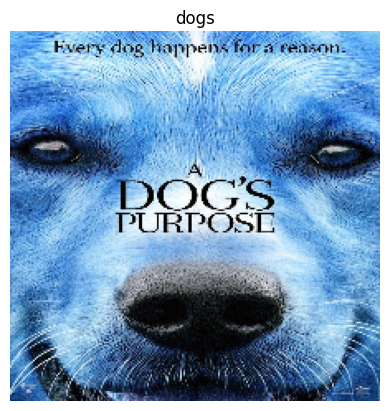

In [72]:
plt.imshow(X[420])
plt.title(y[420])
plt.axis('off')
plt.show()

In [73]:
# plt.imshow(np.random.randint(0,255(224,224,3)))

In [74]:
X = X/255.0
X
#Minmax scler 
#another way using sklearn

array([[[[0.61176471, 0.55294118, 0.36078431],
         [0.62352941, 0.56470588, 0.4       ],
         [0.62352941, 0.56862745, 0.43921569],
         ...,
         [0.59607843, 0.55686275, 0.29411765],
         [0.61176471, 0.56470588, 0.31372549],
         [0.62745098, 0.58039216, 0.32941176]],

        [[0.59215686, 0.53333333, 0.34117647],
         [0.60784314, 0.54901961, 0.38039216],
         [0.61568627, 0.56078431, 0.41960784],
         ...,
         [0.59215686, 0.54901961, 0.29411765],
         [0.60392157, 0.55686275, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        [[0.58823529, 0.53333333, 0.3372549 ],
         [0.60784314, 0.55294118, 0.37647059],
         [0.60784314, 0.54901961, 0.4       ],
         ...,
         [0.59215686, 0.54509804, 0.29411765],
         [0.6       , 0.55294118, 0.30196078],
         [0.61568627, 0.56862745, 0.31764706]],

        ...,

        [[0.31764706, 0.35294118, 0.38823529],
         [0.30196078, 0.3372549 , 0.37254902]

In [75]:
x

[array([[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],
 
        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],
 
        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],
 
        ...,
 
        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],
 
        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],
 
        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
  

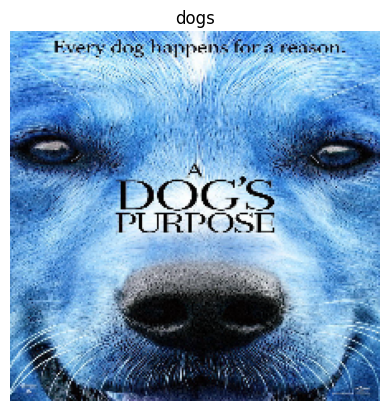

In [76]:
plt.imshow(X[420])
plt.title(y[420])
plt.axis('off')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

# Assuming you have data in X and Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (592, 224, 224, 3) (592,)
Testing data shape: (105, 224, 224, 3) (105,)


In [78]:
# CNN Model Defining
# from tensorflow.keras.models import Sequential, Dense , Con2D
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras import layers # type: ignore

In [79]:
CNN_model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
# Correcting the loss function name
CNN_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Fixed typo here
                  metrics=['accuracy'])


#print model summary for a detailed overview
CNN_model.summary()

c:\Users\Vinayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 40)   │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 24)     │         8,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64896)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 45)             │     2,920,365 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,955,030 (11.27 MB)

 Trainable params: 2,955,030 (11.27 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (592, 224, 224, 3)
y_train shape: (592,)
x_test shape: (105, 224, 224, 3)
y_test shape: (105,)


In [82]:
# Model Training
History = CNN_model.fit(x_train, y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - accuracy: 0.5562 - loss: 0.7661 - val_accuracy: 0.4381 - val_loss: 0.7055
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 473ms/step - accuracy: 0.5725 - loss: 0.6884 - val_accuracy: 0.5238 - val_loss: 0.7040
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - accuracy: 0.6601 - loss: 0.6492 - val_accuracy: 0.5905 - val_loss: 0.6908
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step - accuracy: 0.6463 - loss: 0.6284 - val_accuracy: 0.5619 - val_loss: 0.7129
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - accuracy: 0.6493 - loss: 0.6395 - val_accuracy: 0.6286 - val_loss: 0.7525
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 448ms/step - accuracy: 0.7466 - loss: 0.4698 - val_accuracy: 0.6762 - val_loss: 0.7078
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 452ms/step - accuracy: 0.8340 - loss: 0.3443 - val_accuracy: 0.7238 - val_loss: 0.6187
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 450ms/step - accuracy: 0.9046 - loss: 0.2650 - val_accuracy: 0

<Axes: >

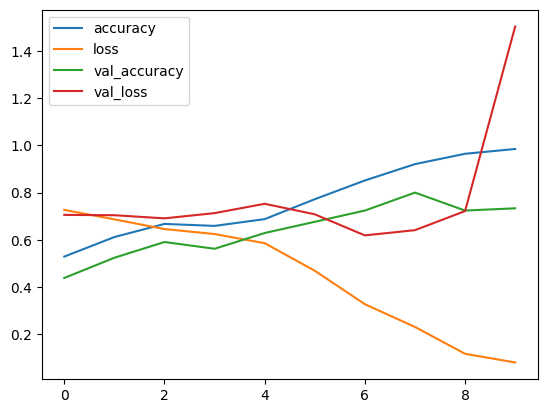

In [83]:
import pandas as pd

pd.DataFrame(History.history).plot()

In [84]:
prediction = CNN_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


In [85]:
prediction.shape  , x_test.shape

((105, 1), (105, 224, 224, 3))

In [86]:
pred= (prediction >0.5).astype(int).ravel()
pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [87]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [88]:
compare_df = pd.DataFrame({"Actual" : y_test , "prediction":pred})
compare_df.head()

,Actual,prediction
0,1,0
1,0,0
2,0,0
3,1,1
4,1,0


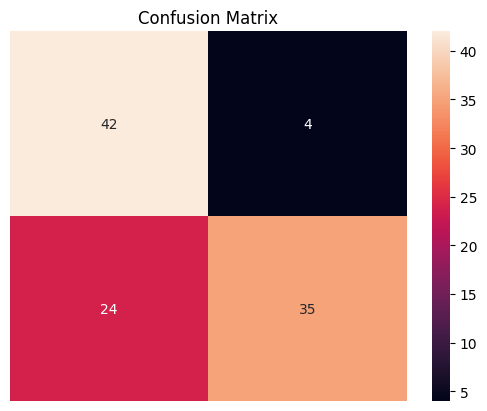

In [89]:
from sklearn.metrics import confusion_matrix,classification_report

matrix = confusion_matrix(compare_df['Actual'],compare_df['prediction'])

sns.heatmap(matrix,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.axis('off')
plt.show()

In [90]:
print("Classification Report!")

print(classification_report(compare_df['Actual'],compare_df['prediction']))

Classification Report!
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        46
           1       0.90      0.59      0.71        59

    accuracy                           0.73       105
   macro avg       0.77      0.75      0.73       105
weighted avg       0.78      0.73      0.73       105



In [92]:
# Saving the models

import os

os.makedirs('Prediction',exist_ok=True)
os.makedirs('models',exist_ok=True)

compare_df['Actual'] = compare_df['Actual'].replace({1: 'cats', 0: 'dogs'})
compare_df['prediction'] = compare_df['prediction'].replace({1: 'cats', 0: 'dogs'})


compare_df.to_csv('prediction/predicted.csv',index=False)
CNN_model.save('models/CNN_model.h5')

In [93]:
compare_df

,Actual,prediction
0,cats,dogs
1,dogs,dogs
2,dogs,dogs
3,cats,cats
4,cats,dogs
...,...,...
100,dogs,dogs
101,cats,cats
102,dogs,dogs
103,cats,dogs
